In [78]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [79]:
df = pd.read_pickle("./mydata_1000.pkl")  

## Task
- Want to build a model to predict how many kudos I will get
- As a starter, I will build a **binary classifier** to predict whether or not the activity will get more than 5 likes
- For a v1, I will build a **random forest** classifier

<Axes: xlabel='kudos_count', ylabel='Count'>

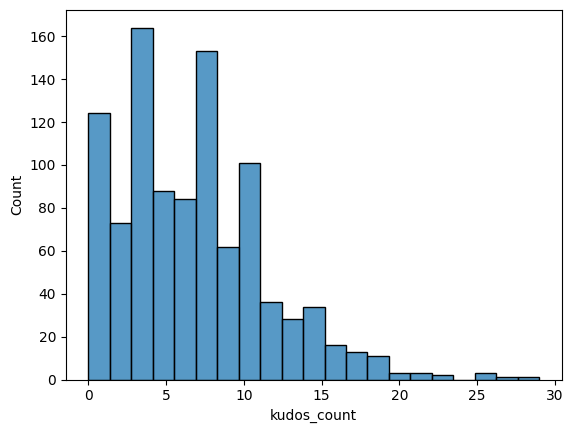

In [80]:
sns.histplot(
    data =df,
    x='kudos_count')

In [81]:
def more_than_five(kudos):
    if kudos>5:
        return 1
    else:
        return 0

df['kudos_gt5'] = df['kudos_count'].apply(more_than_five)
df['kudos_gt5'].value_counts()

kudos_gt5
1    551
0    449
Name: count, dtype: int64

## Feature Engineering
- First we identify what features we are interested in
- Need to re-format some, deal with missing values, normalize, OneHotEncode, etc.

In [82]:
df = df[['kudos_gt5','distance','moving_time','total_elevation_gain','sport_type','max_speed']]
df

,kudos_gt5,distance,moving_time,total_elevation_gain,sport_type,max_speed
0,1,11161.0,4492,147.2,TrailRun,5.500
1,1,16474.3,2157,116.0,Ride,13.062
2,1,11661.0,7937,630.2,TrailRun,4.970
3,1,26759.6,17292,852.7,TrailRun,4.444
4,1,9387.4,7042,133.9,Hike,1.775
...,...,...,...,...,...,...
195,1,6774.5,2042,93.2,Run,5.600
196,0,1353.1,490,3.0,Run,3.300
197,0,886.5,302,3.3,Run,3.800
198,1,9946.5,2839,113.3,Run,5.100


### One Hot Encoding the sport_type column

In [83]:
df['sport_type'].value_counts()

sport_type
Run               295
Rowing            257
Ride              235
WeightTraining     90
Hike               60
Swim               36
Workout            15
TrailRun           10
Walk                2
Name: count, dtype: int64

In [84]:
df = pd.get_dummies(df, columns=['sport_type'], prefix='sport', drop_first=True)
df

,kudos_gt5,distance,moving_time,total_elevation_gain,max_speed,sport_Ride,sport_Rowing,sport_Run,sport_Swim,sport_TrailRun,sport_Walk,sport_WeightTraining,sport_Workout
0,1,11161.0,4492,147.2,5.500,False,False,False,False,True,False,False,False
1,1,16474.3,2157,116.0,13.062,True,False,False,False,False,False,False,False
2,1,11661.0,7937,630.2,4.970,False,False,False,False,True,False,False,False
3,1,26759.6,17292,852.7,4.444,False,False,False,False,True,False,False,False
4,1,9387.4,7042,133.9,1.775,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,6774.5,2042,93.2,5.600,False,False,True,False,False,False,False,False
196,0,1353.1,490,3.0,3.300,False,False,True,False,False,False,False,False
197,0,886.5,302,3.3,3.800,False,False,True,False,False,False,False,False
198,1,9946.5,2839,113.3,5.100,False,False,True,False,False,False,False,False


## Train/ Test Split

In [85]:
X = df.drop('kudos_gt5', axis=1)
y = df['kudos_gt5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Re-scaling numerical columns

In [86]:
numerical_cols = ['distance','moving_time','total_elevation_gain','max_speed']
for col in numerical_cols:
    X_train.loc[:,col] = StandardScaler().fit_transform(X_train[[col]])
    X_test.loc[:,col] = StandardScaler().fit_transform(X_test[[col]])

In [87]:
X_train

,kudos_gt5,distance,moving_time,total_elevation_gain,max_speed,sport_Ride,sport_Rowing,sport_Run,sport_Swim,sport_TrailRun,sport_Walk,sport_WeightTraining,sport_Workout
29,0,-0.004683,0.322343,-0.382690,-1.020823,False,False,False,False,True,False,False,False
135,1,-0.310918,-0.289099,-0.382690,-0.298807,False,True,False,False,False,False,False,False
95,0,0.137360,-0.480839,-0.207587,1.044946,True,False,False,False,False,False,False,False
157,1,0.023946,0.148138,-0.228641,-0.166838,False,False,True,False,False,False,False,False
36,1,-0.637940,-0.064587,-0.382690,-1.020823,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0.140604,-0.468478,-0.186533,1.139409,True,False,False,False,False,False,False,False
70,1,1.358673,-0.015718,-0.382690,1.265562,True,False,False,False,False,False,False,False
60,0,-0.637940,0.138364,-0.382690,-1.020823,False,True,False,False,False,False,False,False
35,1,-0.267364,-0.321007,-0.328650,-0.257090,False,False,True,False,False,False,False,False


## Random Forest Model

In [88]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Evaluate Model Performance

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        90
           1       0.74      0.78      0.76       110

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.73      0.73      0.73       200



In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

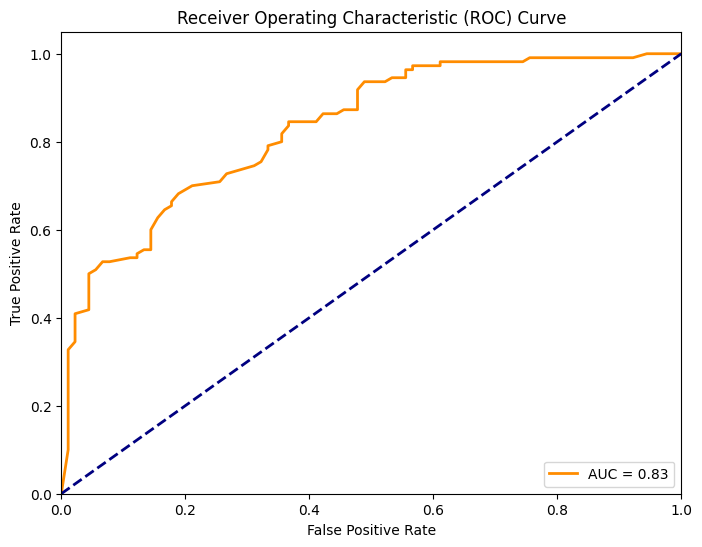

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Try Fiddling With Model Hyperparameters

In [92]:
#First consider the number of trees, default is 100
trees = [20,50,100,200,500,1000]
accuracy = []
for tree_num in trees:
    clf = RandomForestClassifier(random_state=42,n_estimators=tree_num)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

<Axes: >

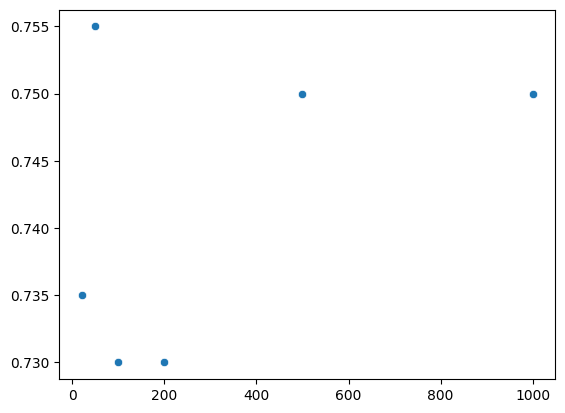

In [93]:
sns.scatterplot(x=trees,y=accuracy)